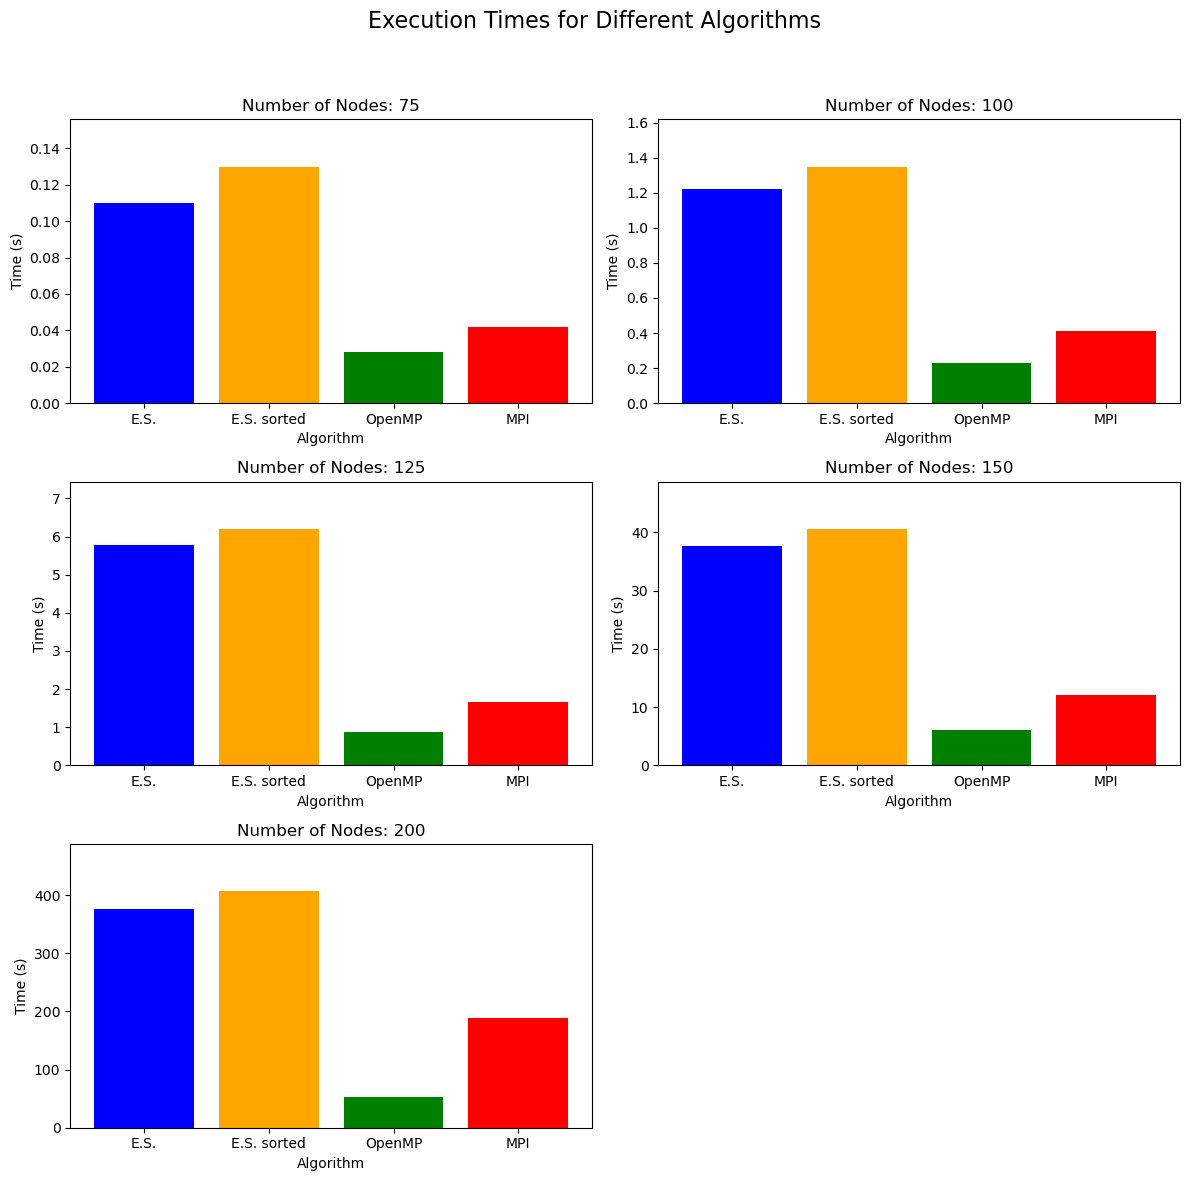

In [2]:
import matplotlib.pyplot as plt

# Dados
n_nodes = [75, 100, 125, 150, 200]
t_ex_search = [0.11, 1.22, 5.77, 37.73, 376.2]
t_ex_search_sorted = [0.13, 1.35, 6.20, 40.57, 406.57]
t_omp = [0.028, 0.23, 0.88, 6.06, 52.76]
t_mpi = [0.042, 0.41, 1.67, 12.07, 188.24]

# Configurando a grade de 3x2
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Execution Times for Different Algorithms', fontsize=16)

# Rótulos e cores
labels = ['E.S.', 'E.S. sorted', 'OpenMP', 'MPI']
colors = ['blue', 'orange', 'green', 'red']

# Dados para cada gráfico
all_times = [t_ex_search, t_ex_search_sorted, t_omp, t_mpi]

# Iterando pelos gráficos (3x2)
for i, ax in enumerate(axes.flat):
    if i >= len(n_nodes):
        ax.axis('off')  # Esconde os subplots extras
        continue
    
    node_idx = i  # Índice do número de nós correspondente
    times = [t[node_idx] for t in all_times]
    
    # Gráfico de barras para o número de nós atual
    ax.bar(labels, times, color=colors)
    ax.set_title(f'Number of Nodes: {n_nodes[node_idx]}')
    ax.set_ylabel('Time (s)')
    ax.set_xlabel('Algorithm')
    ax.set_ylim(0, max(times) * 1.2)  # Ajusta o limite do eixo Y dinamicamente

# Ajusta o layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


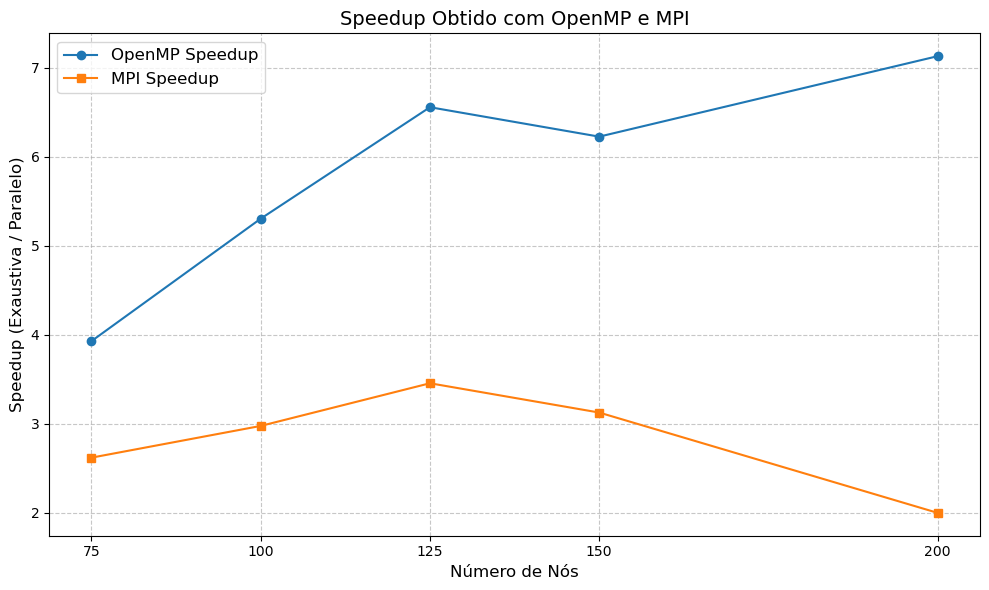

In [8]:
def divide_lists(a, b):
    return [x / y for x, y in zip(a, b)]

nodes = [75, 100, 125, 150, 200]

speedup_mpi = divide_lists(t_ex_search, t_mpi)
speedup_omp = divide_lists(t_ex_search, t_omp)

# Criação do gráfico
plt.figure(figsize=(10, 6))
plt.plot(nodes, speedup_omp, marker='o', label="OpenMP Speedup")
plt.plot(nodes, speedup_mpi, marker='s', label="MPI Speedup")

# Configurações do gráfico
plt.title("Speedup Obtido com OpenMP e MPI", fontsize=14)
plt.xlabel("Número de Nós", fontsize=12)
plt.ylabel("Speedup (Exaustiva / Paralelo)", fontsize=12)
plt.xticks(nodes, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Exibição do gráfico
plt.tight_layout()
plt.show()
